In [67]:
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [43]:
raw_airbnb=pd.read_csv("data/listings.csv")
london_pois=gpd.read_file("data/pois/gis_osm_pois_free_1.shp")
msoa_raw_boundary=gpd.read_file("data/greater_london.gpkg")

In [90]:
msoa_raw_boundary

,geo_code,geo_label,geo_labelw,geometry
0,E02000730,Newham 017,None,"MULTIPOLYGON (((540612.745 184312.782, 540611...."
1,E02000053,Barnet 030,None,"MULTIPOLYGON (((521244.462 190052.504, 521255...."
2,E02000243,Ealing 006,None,"MULTIPOLYGON (((513445.352 183679.664, 513446...."
3,E02000793,Richmond upon Thames 010,None,"MULTIPOLYGON (((513496.024 174051.923, 513495...."
4,E02000077,Bexley 013,None,"MULTIPOLYGON (((546675.313 176656.042, 546675...."
...,...,...,...,...
978,E02000312,Enfield 036,None,"MULTIPOLYGON (((529906.057 191882.472, 529908...."
979,E02000332,Greenwich 020,None,"MULTIPOLYGON (((543496.077 177407.615, 543499...."
980,E02000721,Newham 008,None,"MULTIPOLYGON (((540364.064 185095.035, 540364...."
981,E02000396,Hammersmith and Fulham 025,None,"MULTIPOLYGON (((525384.665 176266.117, 525383...."


In [44]:
geometry = [Point(xy) for xy in zip(raw_airbnb['longitude'], raw_airbnb['latitude'])]
geo_airbnb = gpd.GeoDataFrame(raw_airbnb, geometry=geometry, crs="EPSG:4326")
# 导入爱彼迎CSV，转换为GeoDataFrame

In [45]:
pois_27700 = london_pois.to_crs("EPSG:27700")
geo_airbnb=geo_airbnb.to_crs("EPSG:27700")

london_pois = GeoDataFrame(london_pois, geometry=london_pois['geometry'])
geo_airbnb = GeoDataFrame(geo_airbnb, geometry=geo_airbnb['geometry'])
#重投影统一坐标系

In [46]:
#筛掉不需要的列
geo_airbnb=geo_airbnb.drop(columns=['id', 'name', 'neighbourhood_group','availability_365'])

In [87]:
airbnb_intersect = gpd.sjoin(geo_airbnb, msoa_raw_boundary, how="inner", predicate="intersects")
# 清洗数据：去除空格、处理缺失值
airbnb_intersect['room_type'] = airbnb_intersect['room_type'].str.strip().fillna('Unknown')
#交汇爱彼迎数据与空间

In [48]:
airbnb_intersect

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,license,geometry,index_right,geo_code,geo_label,geo_labelw
0,586671,Joe,Enfield,51.611370,-0.118880,Private room,40.0,7,38,2024-01-01,0.28,1,1,NaN,POINT (530348.644 191957.524),978,E02000312,Enfield 036,None
1,255103,Olga,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5,91,2024-06-09,0.59,1,10,NaN,POINT (522742.258 179547.882),899,E02000376,Hammersmith and Fulham 005,None
2,134938,Ron,Camden,51.559528,-0.144319,Entire home/apt,215.0,5,216,2024-07-09,1.35,1,5,NaN,POINT (528733.585 186147.463),836,E02000168,Camden 003,None
3,161720,Andy,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2,0,NaN,NaN,1,0,NaN,POINT (515478.125 173394.167),338,E02000797,Richmond upon Thames 014,None
4,646165,Yevgeniy,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30,148,2024-06-15,0.93,2,12,NaN,POINT (531202.89 178638.176),829,E02000619,Lambeth 002,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96177,480846254,Bartłomiej,Camden,51.547717,-0.143016,Entire home/apt,155.0,1,0,NaN,NaN,1,0,NaN,POINT (528857.301 184836.343),847,E02000172,Camden 007,None
96178,25727709,Frankie Says,Southwark,51.505380,-0.091734,Entire home/apt,238.0,5,0,NaN,NaN,37,0,NaN,POINT (532535.631 180219.879),118,E02000808,Southwark 002,None
96179,25727709,Frankie Says,Southwark,51.505380,-0.091734,Entire home/apt,188.0,5,0,NaN,NaN,37,0,NaN,POINT (532535.631 180219.879),118,E02000808,Southwark 002,None
96180,25727709,Frankie Says,Southwark,51.505380,-0.091734,Entire home/apt,457.0,5,0,NaN,NaN,37,0,NaN,POINT (532535.631 180219.879),118,E02000808,Southwark 002,None


In [49]:
airbnb_intersect.to_csv("airbnb_intersect.csv", index=False)
print("数据已成功导出为 CSV 文件！")

数据已成功导出为 CSV 文件！


#比较单房东和多房东的数量
#比较单房东的房源数量和多方懂得房源数量

In [62]:
# 去重房东，并保留他们的 listings_count（去重基于 host_name）
unique_hosts = airbnb_intersect[['host_name', 'calculated_host_listings_count']].drop_duplicates()

# 筛选单房东 (calculated_host_listings_count == 1) 的数量
single_host_count = (unique_hosts['calculated_host_listings_count'] == 1).sum()

# 筛选多房东 (calculated_host_listings_count > 1) 的数量
multi_host_count = (unique_hosts['calculated_host_listings_count'] > 1).sum()


# 统计多房东控制的房源数量
multi_host_listings = unique_hosts.loc[unique_hosts['calculated_host_listings_count'] > 1, 'calculated_host_listings_count'].sum()

# 计算房源总量和比例
total_listings = len(airbnb_intersect)
multi_host_listings_ratio = multi_host_listings / total_listings * 100

# 打印结果
print(f"Single Host Count: {single_host_count}")
print(f"Multi Host Count: {multi_host_count}")
print(f"多房东控制的房源占比: {multi_host_listings_ratio:.2f}%")

Single Host Count: 13469
Multi Host Count: 7526
多房东控制的房源占比: 43.33%


In [63]:
unique_hosts

,host_name,calculated_host_listings_count
0,Joe,1
1,Olga,1
2,Ron,1
3,Andy,1
4,Yevgeniy,2
...,...,...
96144,Kayvahn,1
96146,Xiong,1
96166,Firmino,1
96168,Mihail,2


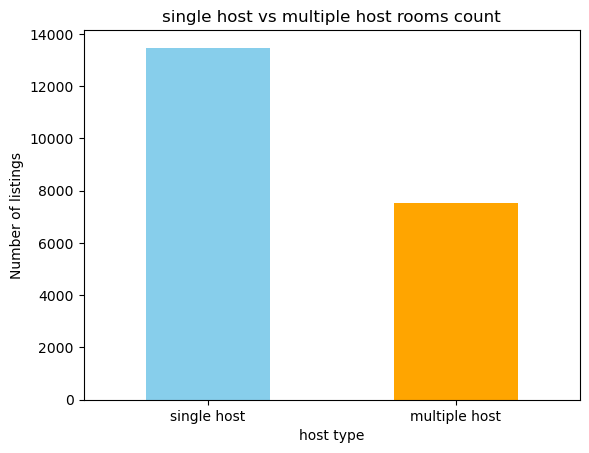

In [71]:
single_host_count = 13469
multi_host_count = 7526

# 将数据整理成一个 Series 以便绘图
data = pd.Series(
    [single_host_count, multi_host_count],
    index=["single host", "multiple host"]
)

# 绘制柱状图
data.plot(kind="bar", color=["skyblue", "orange"])
plt.title("single host vs multiple host rooms count")
plt.xlabel("host type")
plt.ylabel("Number of listings")
plt.xticks(rotation=0)  # 保证标签水平显示
plt.show()

In [65]:
#按房源类型统计其数量和占比（如整套、公寓、单间）
listing_type_stats = airbnb_intersect["room_type"].value_counts(normalize=True)
#按房源类型分组，计算平均出租天数和收入
# 估算总出租天数 = 最小出租天数 * 每月评论数 * 12（近似一年）
airbnb_intersect['estimated_rented_days'] = airbnb_intersect['minimum_nights'] * airbnb_intersect['reviews_per_month'] * 12
airbnb_intersect['estimated_annual_income'] = airbnb_intersect['estimated_rented_days'] * airbnb_intersect['price']

# 分组计算平均出租天数和年度收入
summary_stats = airbnb_intersect.groupby('room_type').agg(
    average_rented_days=('estimated_rented_days', 'mean'),
    average_annual_income=('estimated_annual_income', 'mean')
).reset_index()

In [66]:
print("不同房源类型的平均出租天数和年度收入:")
print(summary_stats)

不同房源类型的平均出租天数和年度收入:
         room_type  average_rented_days  average_annual_income
0  Entire home/apt            44.644588            9740.066858
1       Hotel room             8.681481            1802.414867
2     Private room            30.136970            3441.996884
3      Shared room            21.070200            3586.605517


#房源类型分布饼图

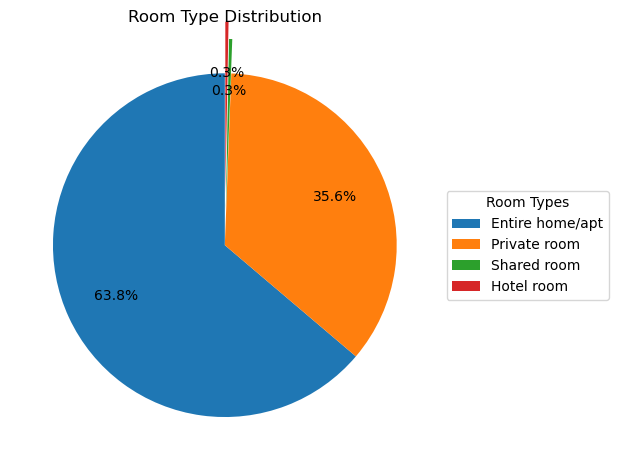

In [88]:
data = pd.Series(
    [63.8, 35.6, 0.3, 0.3],
    index=["Entire home/apt", "Private room", "Shared room", "Hotel room"]
)

# 定义 explode 参数，让小的部分分离更明显
explode = [0, 0, 0.2, 0.3]  # 分离 Shared room 和 Hotel room

# 绘制饼图
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    explode=explode,
    labels=None,  # 关闭标签
    autopct="%1.1f%%",  # 显示所有百分比
    startangle=90,
    shadow=False,
    colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
    pctdistance=0.7  # 控制百分比显示的位置
)

# 添加图例（Legend）
ax.legend(
    wedges,
    data.index,
    title="Room Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# 添加标题
plt.title("Room Type Distribution")
plt.tight_layout()  # 自动调整布局，避免重叠
plt.show()

#房源类型分布地图

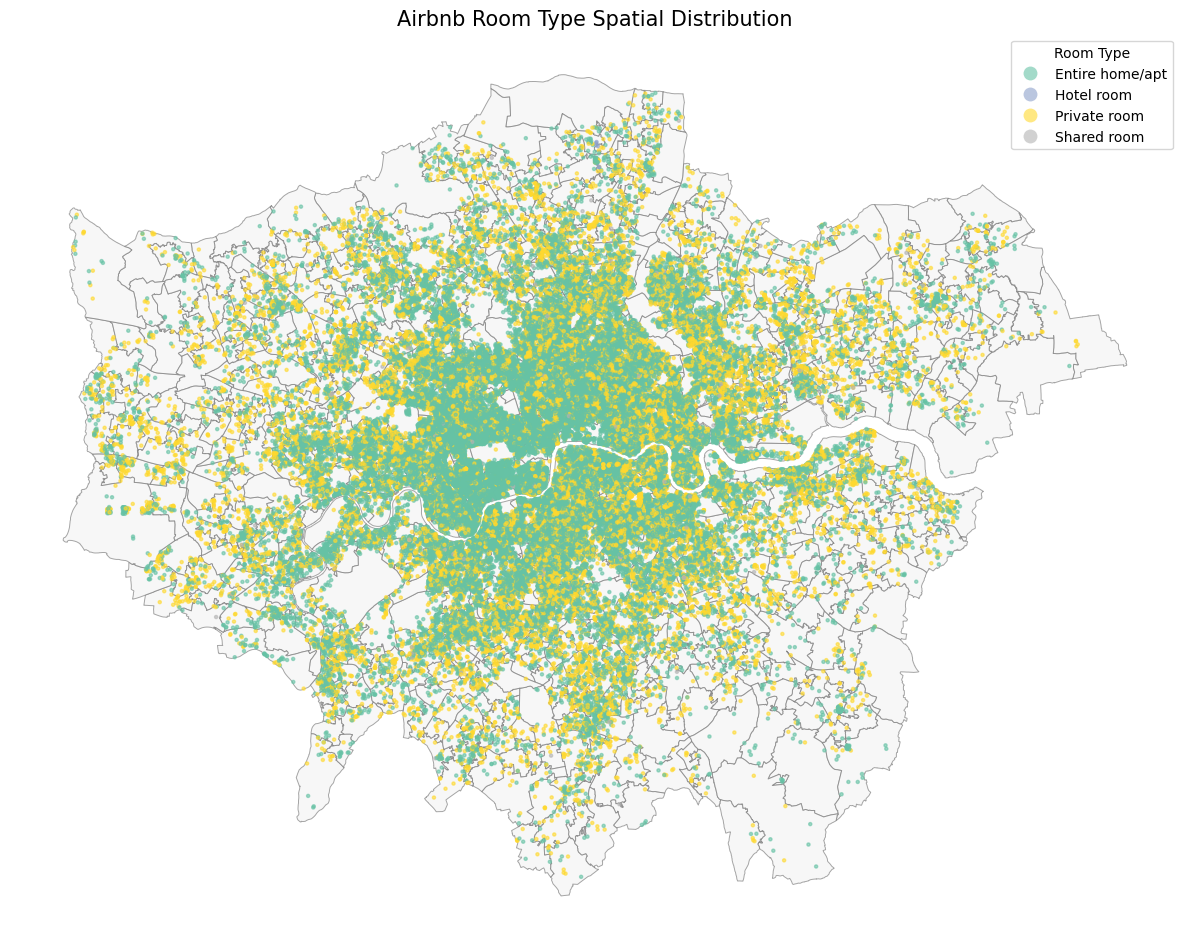

In [105]:
import matplotlib.pyplot as plt
import geopandas as gpd

# 确保数据已合并
airbnb_gdf = airbnb_intersect_merged_gdf
boundary_gdf = msoa_raw_boundary

# 设置图表大小和风格
fig, ax = plt.subplots(figsize=(12, 12))
plt.style.use("seaborn-v0_8-muted")  # 设置更现代的样式

# 绘制区域边界（较浅的背景）
boundary_gdf.plot(ax=ax, color='whitesmoke', edgecolor='grey', linewidth=0.7, alpha=0.7)

# 绘制房源类型分布点图
airbnb_gdf.plot(
    ax=ax,
    column='room_type',      # 按房源类型区分颜色
    cmap='Set2',             # 使用调色板
    markersize=5,            # 调整点的大小
    alpha=0.6,               # 增加透明度
    legend=True              # 显示图例
)

# 设置图例样式（放置到合适位置）
legend = ax.get_legend()
if legend:
    legend.set_title("Room Type")
    legend.set_bbox_to_anchor((1, 1))  # 将图例放置在右上角

# 设置地图标题和坐标轴
plt.title("Airbnb Room Type Spatial Distribution", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# 美化显示
plt.axis("off")  # 去掉坐标轴框线
plt.tight_layout()
plt.show()

#按行政区域划分查看房源密度

In [112]:
# 按 geo_code 分组，统计 host_id 数量
region_stats = airbnb_intersect.groupby("geo_code")["host_id"].count()

# 重命名 Series 的名称为 'listing_count'
region_stats.name = "listing_count"

# 重置索引，使其变成 DataFrame
region_stats = region_stats.reset_index()

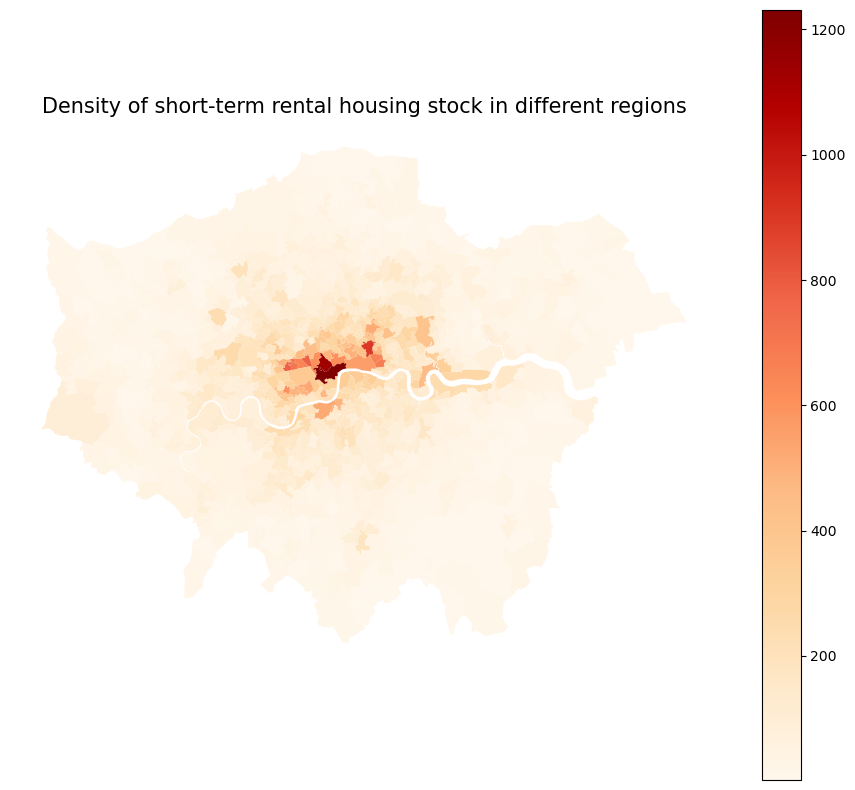

In [115]:
geo_df = msoa_raw_boundary.merge(region_stats, on="geo_code")
fig, ax = plt.subplots(figsize=(10, 8))
geo_df.plot(column="listing_count", cmap="OrRd", legend=True, ax=ax)

# 调整颜色条的高度
cbar_ax = fig.get_axes()[-1]  # 获取颜色条
cbar_ax.set_position([0.92, 0.3, 0.02, 0.5])  # 设置颜色条在右侧较低位置

# 添加标题
plt.title("Density of short-term rental housing stock in different regions", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
categories = london_pois['fclass'].unique()
categories
#查看poi类型

array(['waste_basket', 'bicycle_rental', 'tourist_info', 'pub',
       'restaurant', 'post_box', 'camera_surveillance', 'library',
       'post_office', 'telephone', 'fountain', 'artwork', 'toilet',
       'cafe', 'pitch', 'recycling', 'bar', 'cinema', 'memorial',
       'monument', 'recycling_glass', 'convenience', 'furniture_shop',
       'laundry', 'courthouse', 'school', 'sports_centre', 'attraction',
       'supermarket', 'university', 'beverages', 'fast_food',
       'fire_station', 'water_tower', 'newsagent', 'doctors',
       'department_store', 'museum', 'hotel', 'playground', 'gift_shop',
       'atm', 'veterinary', 'pharmacy', 'dentist', 'chemist', 'theatre',
       'bank', 'bicycle_shop', 'car_rental', 'bakery', 'hairdresser',
       'doityourself', 'comms_tower', 'hospital', 'car_sharing',
       'archaeological', 'town_hall', 'nursing_home', 'embassy',
       'recycling_paper', 'college', 'viewpoint', 'kindergarten',
       'recycling_clothes', 'public_building', 'arts_ce

In [9]:
filtered_pois = pois_27700[pois_27700['fclass'].isin(['hotel', 'guesthouse', 'motel', 'hostel', 'chalet'])]
#从osm过滤与住宿酒店有关的poi

In [10]:
#交汇poi和msoa
pois_intersect = gpd.sjoin(filtered_pois,msoa_raw_boundary, how="inner", predicate="intersects")

In [11]:
pois_intersect

,osm_id,code,fclass,name,geometry,index_right,geo_code,geo_label,geo_labelw
216,29372721,2401,hotel,Sundridge Park hotel and conference Ctr,POINT (541758.442 170636.766),783,E02006782,Bromley 040,None
315,31314241,2401,hotel,DoubleTree by Hilton Hotel London - Marble Arch,POINT (528005.712 181126.527),531,E02000971,Westminster 012,None
674,59931333,2401,hotel,easyHotel Victoria,POINT (529084.799 178640.967),331,E02000981,Westminster 022,None
1331,254025974,2401,hotel,Crestfield Hotel,POINT (530336.901 182875.437),341,E02000189,Camden 024,None
1332,254025975,2401,hotel,Kings Cross Inn Hotel,POINT (530299.32 182930.789),341,E02000189,Camden 024,None
...,...,...,...,...,...,...,...,...,...
89067,12139667177,2401,hotel,Spark by Hilton London Romford,POINT (551362.825 188536.933),27,E02000476,Havering 013,None
89245,12152771492,2401,hotel,Hotel Xanadu,POINT (517652.111 180568.136),363,E02000257,Ealing 020,None
89402,12167570871,2401,hotel,Travelodge,POINT (518237.668 169276.216),102,E02000606,Kingston upon Thames 009,None
89883,12199188775,2401,hotel,Diana Hotel,POINT (522141.92 183036.457),684,E02000123,Brent 031,None


In [12]:
accommodation_summerize=(
    pois_intersect
    .groupby(['geo_code','fclass'])
    .agg({
        'geo_label': 'first',
    })

    .reset_index()
)
#分类酒店类型和区域的列表

In [13]:
accommodation_summerize#分类酒店类型和区域的列表

,geo_code,fclass,geo_label
0,E02000001,guesthouse,City of London 001
1,E02000001,hostel,City of London 001
2,E02000001,hotel,City of London 001
3,E02000016,hotel,Barking and Dagenham 015
4,E02000031,hotel,Barnet 008
...,...,...,...
215,E02006802,hostel,Southwark 034
216,E02006854,hotel,Tower Hamlets 033
217,E02006928,hostel,Greenwich 035
218,E02006928,hotel,Greenwich 035


In [14]:
#汇总酒店数量并且重命名列
hotel_summarize = (
    accommodation_summerize
    .groupby(['geo_code'])
    .agg({
        'geo_label': 'first',  # 获取每个分组的 geo_label 第一条记录
        'fclass': 'count'      # 统计每组的 fclass 数量（如酒店数量）
    })
    .reset_index()
)

hotel_summarize.rename(columns={'fclass': 'count'}, inplace=True)

# 查看结果
print(hotel_summarize)

      geo_code                 geo_label  count
0    E02000001        City of London 001      3
1    E02000016  Barking and Dagenham 015      1
2    E02000031                Barnet 008      1
3    E02000051                Barnet 028      1
4    E02000057                Barnet 034      1
..         ...                       ...    ...
181  E02006801               Lambeth 036      2
182  E02006802             Southwark 034      1
183  E02006854         Tower Hamlets 033      1
184  E02006928             Greenwich 035      2
185  E02006930             Greenwich 037      1

[186 rows x 3 columns]


In [15]:
hotel_summarize

,geo_code,geo_label,count
0,E02000001,City of London 001,3
1,E02000016,Barking and Dagenham 015,1
2,E02000031,Barnet 008,1
3,E02000051,Barnet 028,1
4,E02000057,Barnet 034,1
...,...,...,...
181,E02006801,Lambeth 036,2
182,E02006802,Southwark 034,1
183,E02006854,Tower Hamlets 033,1
184,E02006928,Greenwich 035,2
